<center><h1>Customer Churn Analyis<h1></center>

### Abstrarct :

<p>In the competitive landscape of telecommunication, customer churn poses a significant challenge, impacting revenue and market share. With this project I aim to analyze the cusotmer churn patterns within a telecom company to understand the underlying factors contributing to customer attrition. The study leverages historical customer data including demographic information, service usage metrics and cusotmer interaction logs. Through exploratory data analysis and predictive modeling techniques, key drivers of churn will be identified. such as service dissatisfaction, pricing strategies, contract terms and customer support effectiveness. </p>

### Problem Statement

The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer churn patterns, I aim to identify the factors that contribute to churn and develop strategies to mitigate it. 

### Project Description

In this project, I worked with a dataset from a telecom company that includes information about  their customers, such as demographiccs, customer Accounting Information, Service Information. The dataset also included a churn indicator that specifies whether a customer has churned or not?

### Desired Outcome:

My main goal is to build a Machine Learning Model that can predict whether a customer would leave the serivces of company based on the different features of the data 


### Algorithms used:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Adabosst Classifier
- GradientBoost Classifier

### About the Data

The data is divided into three parts (with the following features):

- <h4>Demographich inofrmation</h4>

    - gender : Gender of the customer.
    - SeniorCitizen : Whether customer is a senior citizen or not ?
    - Partner : Whether customer has a partner or not ?
    - Dependents : Whther the customer has a dependent or not ?

- <h4>Customer Accounting Information:</h4>

    - Contract : The contract term of the customer (month-to-month, one-year, two-year)
    - PaperlessBilling : Whether customer has paperless billing or not ?
    - Monthly Charges : Amount charged to the customer monthly 
    - Total Charges : Total amount charged to the customer
    - Tenure : Number of months the customer has stayed with the company. 
    - PaymentMethod : The customer's payment mehtod (Electronic cheque, Mailed cheque, Bank Transfer)
    - customerID

- <h4>Service Information</h4>
    
    - PhoneService : Whether the customer has a phone or not ?
    - MultipleLines : Whether the customer has multiple lines or not ?
    - InternetService : Customer't Internet Service Provider?
    - OnlineSecurity : Whether the customer has online security or not ?
    - OnlineBackup : Whether the customer has online backup or not ?
    - DeviceProtection : Whether the customer has device prothection or not ?
    - TechSupporot : Whether the customer has Tech Support or not ?
    - Streaming Tv : Whether the customer has a streaming tv or not ?
    - Streamin Movies: Whether the customer has streaming movies or not ?


### Target Variable :
    

<span style="background-color: #FFFF00">Whetherr the customer chured or not ?</span>


### Data Preparation and Feature Engineering

In [2]:
#EDA

import numpy as np
import pandas as pd


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h5>Importing Dataframe</h5>

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h4>Data Information</h4>

In [4]:
#shape of data ?

df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h4>Unique Values in each column</h4>

In [6]:
for col in df.columns:
    print(f"column {col} : Unique Values : {df[col].unique()}")

column customerID : Unique Values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column gender : Unique Values : ['Female' 'Male']
column SeniorCitizen : Unique Values : [0 1]
column Partner : Unique Values : ['Yes' 'No']
column Dependents : Unique Values : ['No' 'Yes']
column tenure : Unique Values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column PhoneService : Unique Values : ['No' 'Yes']
column MultipleLines : Unique Values : ['No phone service' 'No' 'Yes']
column InternetService : Unique Values : ['DSL' 'Fiber optic' 'No']
column OnlineSecurity : Unique Values : ['No' 'Yes' 'No internet service']
column OnlineBackup : Unique Values : ['Yes' 'No' 'No internet service']
column DeviceProtection : Unique Values : ['No' 'Yes' 'No internet service']
column TechSupport

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#converting Total charges from string to numeric 

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

<h4>Descriptive Stats</h4>

In [9]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


- Senior Citizen is categorical data - shouldn't be in this table
- 75% customers have tenure lesss than 55 months.
- Average monthly charges are USD 64.76 whereas 25 % of the customers pay more than USD 89.85 per month.

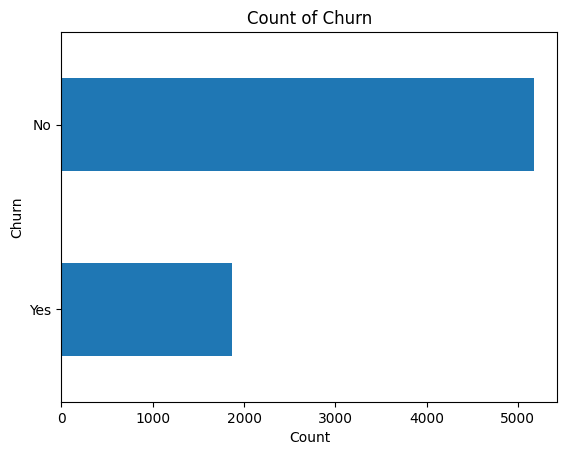

In [10]:
df["Churn"].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df1 = df.copy()

In [13]:
df1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df[df["TotalCharges"].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<h4>Missing Values Treatement</h4>

In [15]:
print(f"Percentage rows with missing info in TotalCharges columns : {float(df["TotalCharges"].isna().sum()/df.shape[0] * 100)} %")

Percentage rows with missing info in TotalCharges columns : 0.1561834445548772 %


Since the percentage of missing records in `0.16 %`, this data can be ignored.

In [16]:
#Removing missing values

df.dropna(how = "any", inplace = True)

<H4>Dividing Customers based on Tenure</H4>


In [17]:
print(f"Max Tenure : {df["tenure"].max()}")

Max Tenure : 72


In [18]:
#Defining bins and labels

bins = [0,12,24,36,48,60,72]
labels = ["1-12", "13-24", "25-36", "37-48", "49-60", "61-72"]

#Create a new tenure_group columns


df["tenure_group"] = pd.cut(df["tenure"], bins = bins, labels = labels , right = False)

In [19]:
df["tenure_group"].value_counts()

tenure_group
1-12     2058
61-72    1121
13-24    1047
25-36     876
49-60     820
37-48     748
Name: count, dtype: int64

<h4>Dropping redundant columns</h4>

In [20]:
df.drop(columns = ["customerID", "tenure"], axis = 1, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


### Univariate Analysis

- Plot distribution of individual predictors by Churn 

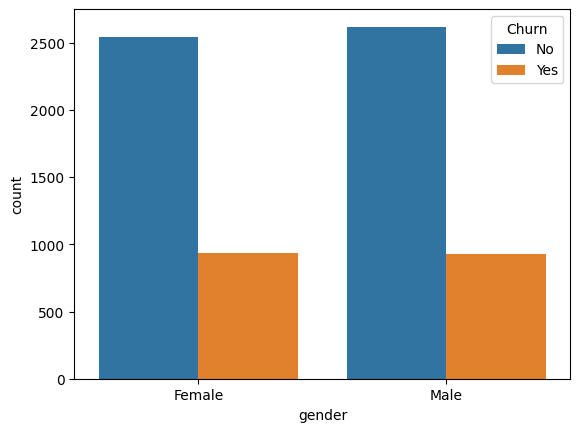

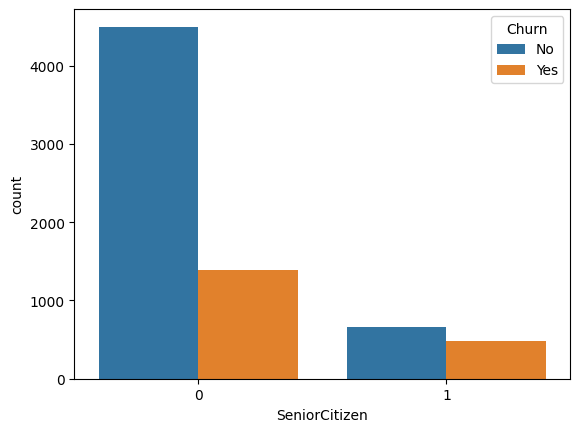

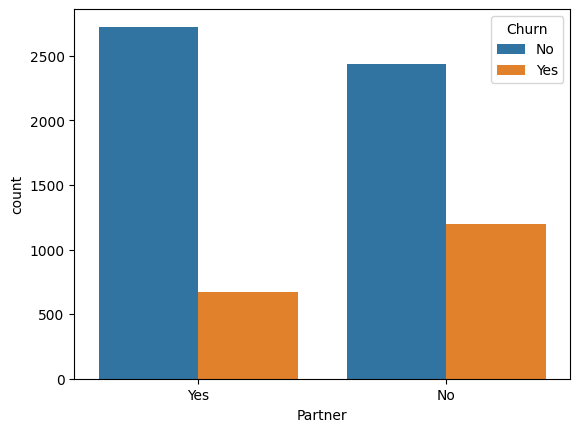

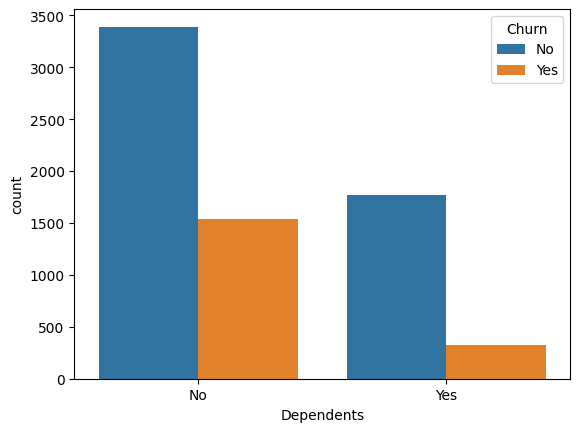

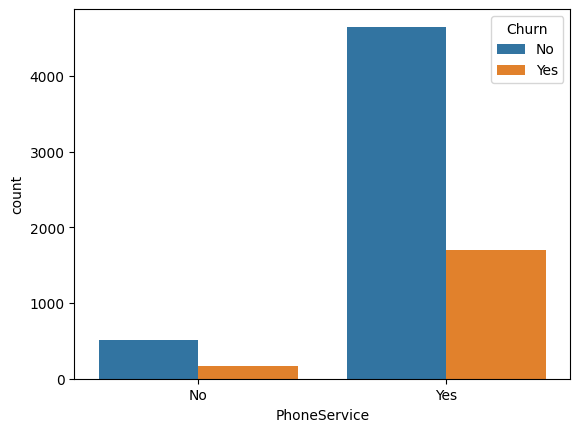

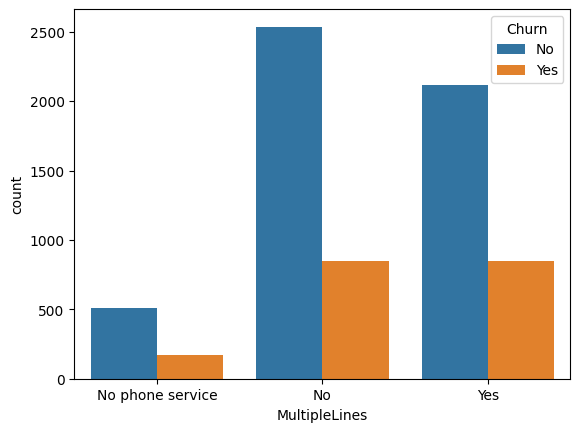

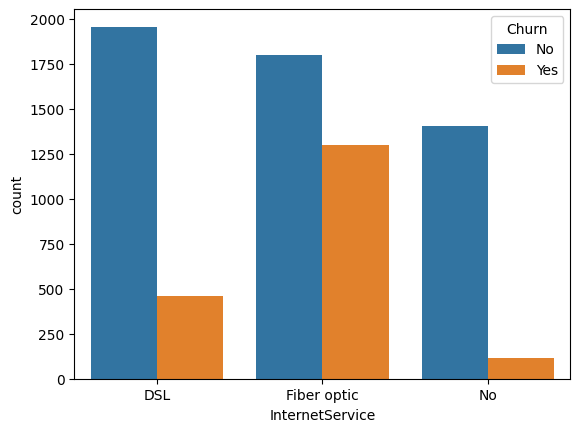

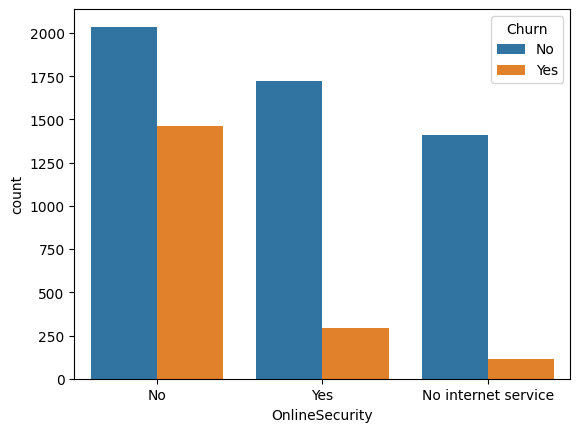

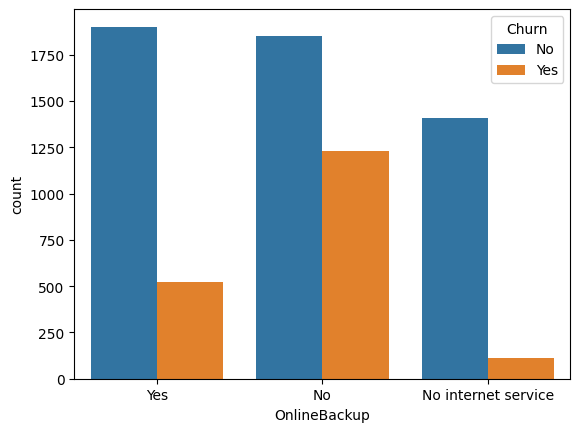

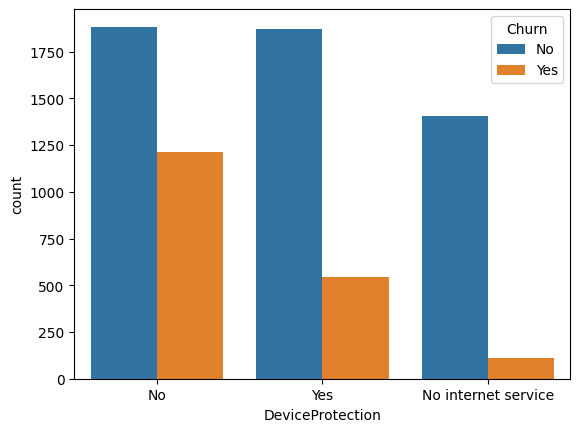

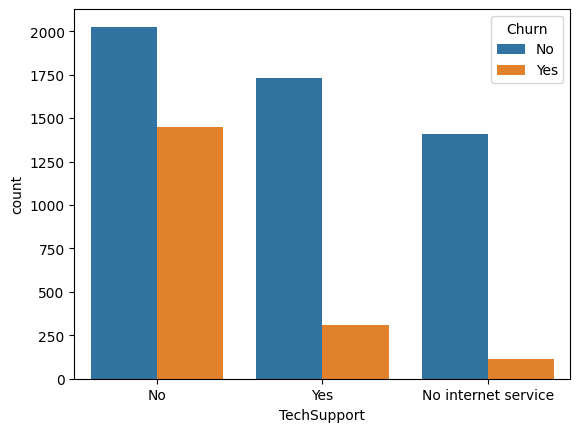

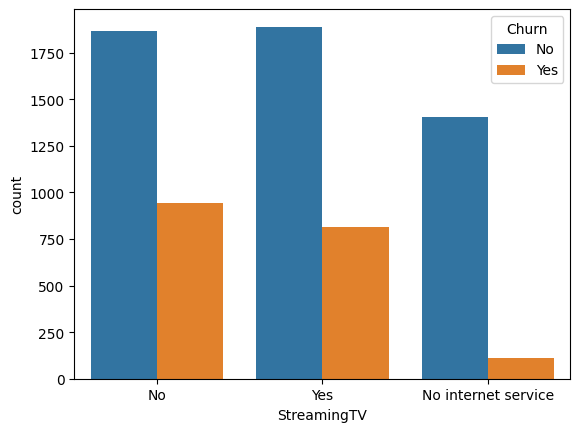

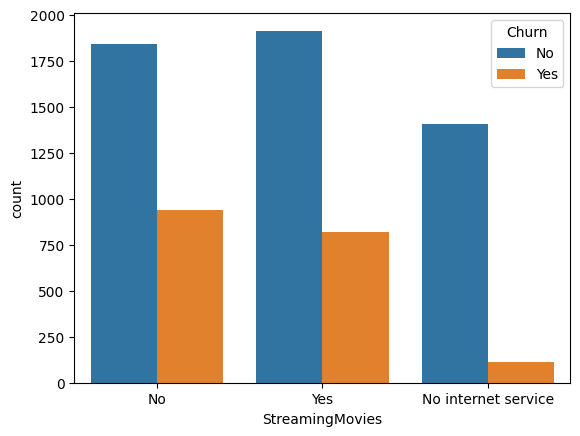

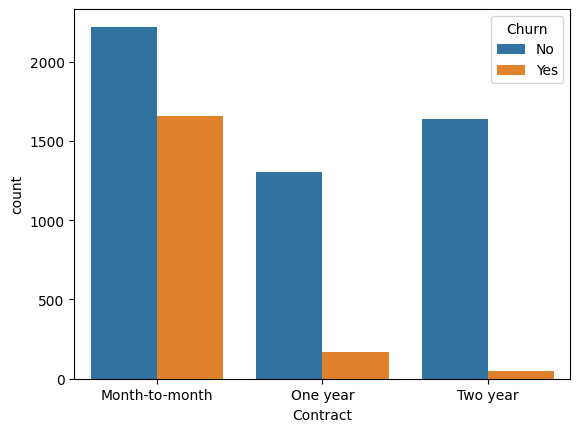

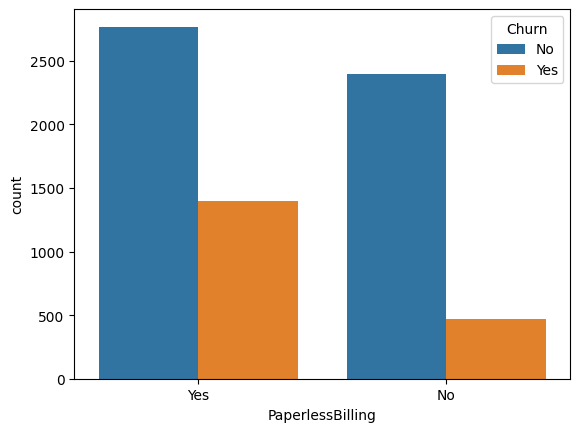

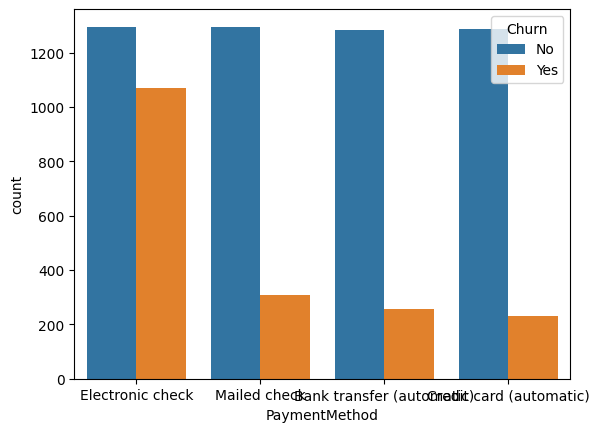

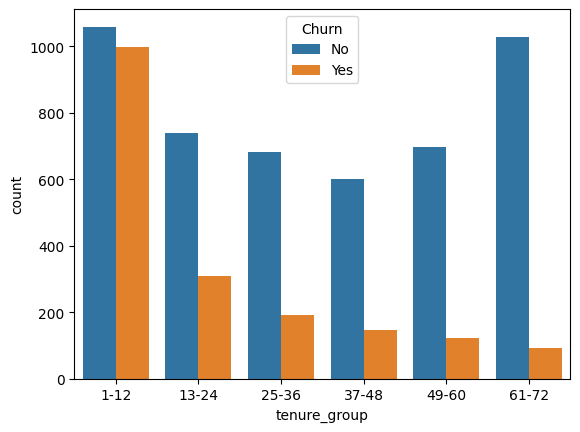

In [21]:
for i, predictor in enumerate(df.drop(columns = ["Churn", "MonthlyCharges", "TotalCharges"])): #Dropped all the numeric variables
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue = "Churn")

<p>Convert the target variable "Churn" into binary numeric variable : 0 or 1</p>

In [22]:
df["Churn"] = df["Churn"].map({"No":0,"Yes":1})
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
1539,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,50.30,217.10,0,1-12
5027,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,85.55,851.75,1,1-12
856,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.05,6309.65,0,NaN


In [23]:
#Imputing empty rows in tenure_group

df["tenure_group"] = df["tenure_group"].fillna(df["tenure_group"].mode()[0])

### Convert all categorical variables to dummy variables

In [24]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(["object", "category"]).columns

df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
4933,0,0,0,1,0,1,0,2,2,2,0,2,2,0,1,3,57.20,223.75,0,0
746,1,1,1,1,1,2,1,2,2,2,2,2,2,2,1,0,114.95,8196.40,0,0
1773,0,0,1,1,1,0,2,1,1,1,1,1,1,2,1,0,19.35,1292.65,0,5
3659,1,0,1,0,1,2,1,2,2,2,0,2,2,1,0,1,109.90,7332.40,0,5
6212,1,0,0,0,0,1,0,0,0,2,0,2,2,1,0,2,50.75,688.20,0,1


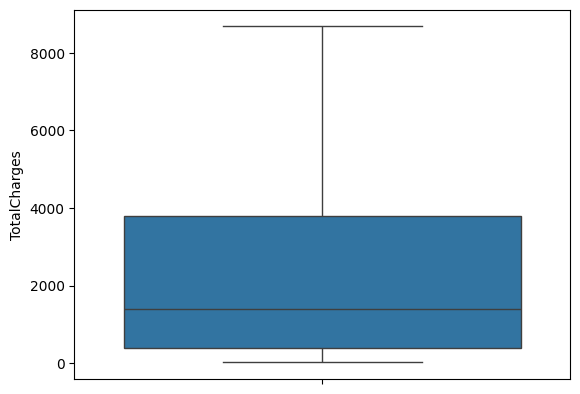

In [26]:
sns.boxplot(data = df["TotalCharges"])
plt.show()

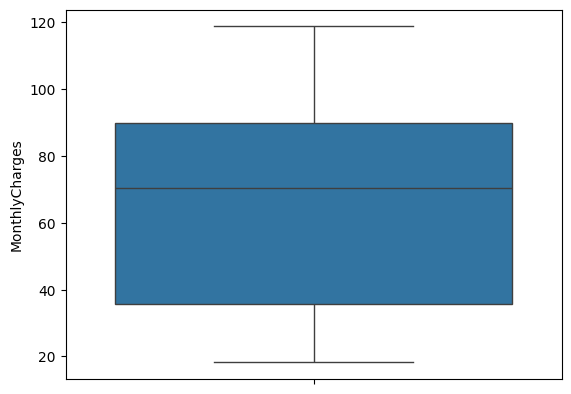

In [27]:
sns.boxplot(data = df["MonthlyCharges"])
plt.show()

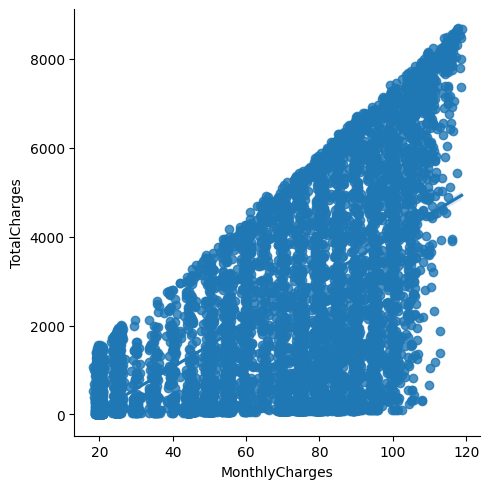

In [28]:
sns.lmplot(data = df, x = "MonthlyCharges", y = "TotalCharges", fit_reg = True)

### Monthly Charges vs Churn Rate

Text(0.5, 1.0, 'Monthly charges density vs Churn')

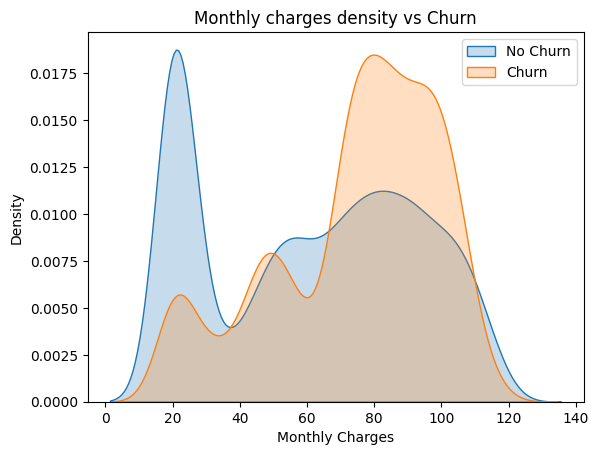

In [ ]:
month_plot = sns.kdeplot(df.MonthlyCharges[(df["Churn"]) == 0], fill = True)    #filters out the monthly charges corresponding to which Churn does not happen
month_plot = sns.kdeplot(df.MonthlyCharges[(df["Churn"]) == 1], fill = True)    #filters out complimentary of above
month_plot.legend(["No Churn", "Churn"], loc = 'upper right')
month_plot.set_label("Density")
month_plot.set_xlabel("Monthly Charges")
month_plot.set_title("Monthly charges density vs Churn")
plt.show()

<strong>Insights :</strong>
- For Monthly Charge around 80, churn is very high.
- For less Monthly Charge, retention is high. 

### Total Charges vs Churn

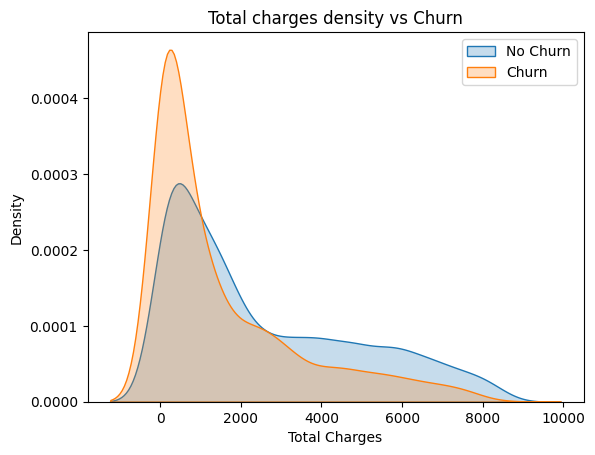

In [43]:
month_plot = sns.kdeplot(df.TotalCharges[(df["Churn"]) == 0], fill = True)    #filters out the monthly charges corresponding to which Churn does not happen
month_plot = sns.kdeplot(df.TotalCharges[(df["Churn"]) == 1], fill = True)    #filters out complimentary of above
month_plot.legend(["No Churn", "Churn"], loc = 'upper right')
month_plot.set_label("Density")
month_plot.set_xlabel("Total Charges")
month_plot.set_title("Total charges density vs Churn")
plt.show()

- Customer with higher total charges are less likely to churn

<Axes: >

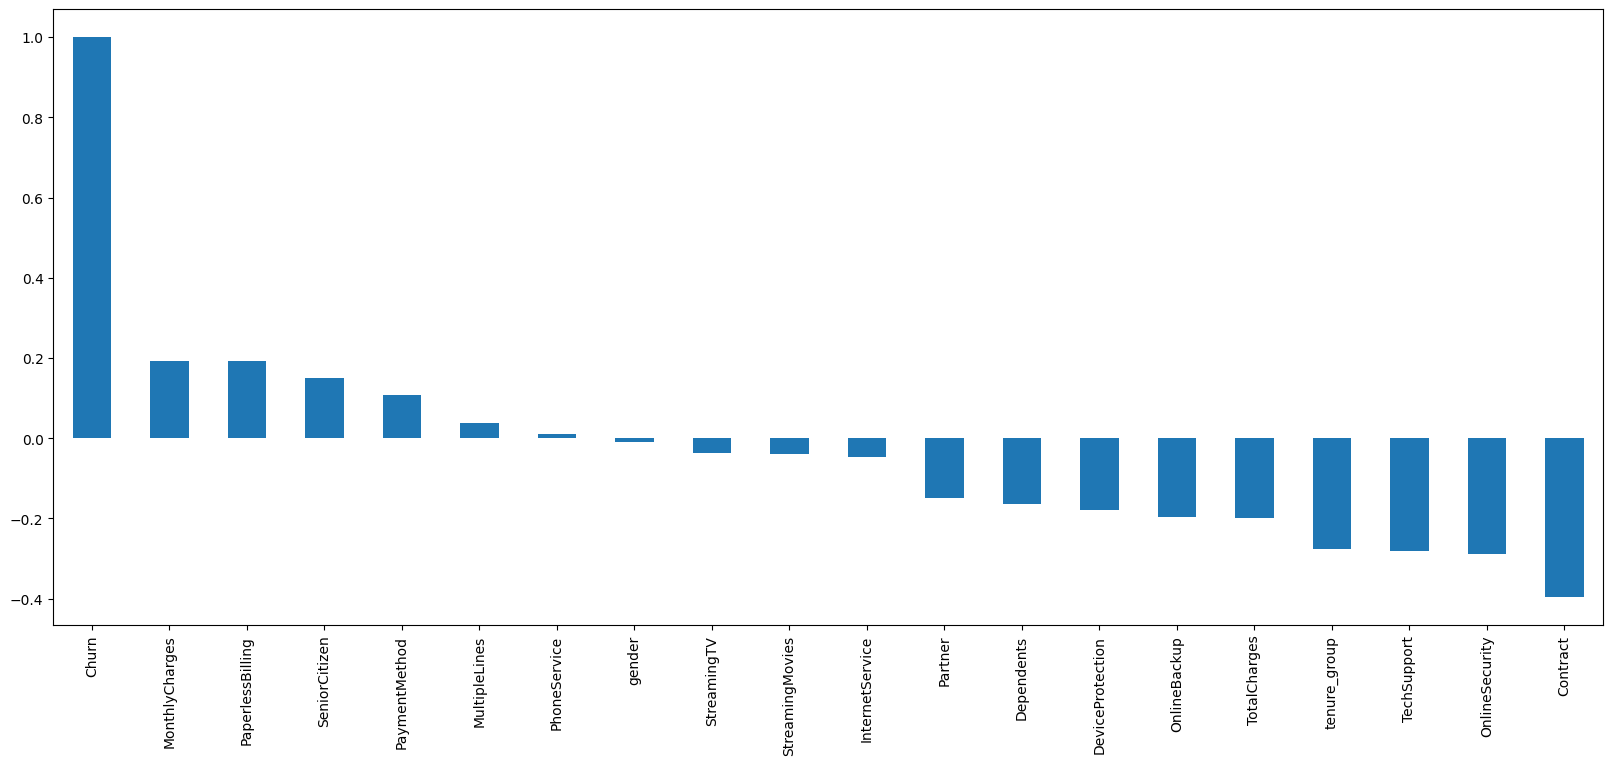

In [69]:
# plt.figure(figsize=(15,15))
# ax = sns.heatmap(), annot = True)
plt.figure(figsize=(20,8))
df_corr = df.corr()
df_corr.iloc[18].sort_values(ascending=False).plot(kind="bar") #by taking out row which contain churn values vs all other feature